In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [67]:
df = pd.read_csv("../Datasets/Fashion_Trend.csv")
df

,Brand,Description,Product_ID,Discount_Price,Original_Price,Gender,Category,Discounted_amount,Discount_Percentage,Product_Name,Price_Segment,Discount_Tier
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974,1299,Men,Activewear,325,25.02,Track Pants,Mid (₹500–₹1499),Moderate (20-40%)
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499,1499,Men,Activewear,0,0.00,Sports Shoes,Mid (₹500–₹1499),No Discount
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461,549,Men,Activewear,88,16.03,Crew-Neck T-shirt,Mid (₹500–₹1499),Light (10-20%)
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189,1699,Men,Activewear,510,30.02,Print Joggers,Premium (₹1500–₹3999),Moderate (20-40%)
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425,599,Men,Activewear,174,29.05,Crew-Neck T-shirt,Mid (₹500–₹1499),Moderate (20-40%)
...,...,...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299,1299,Women,Westernwear,0,0.00,Printed Top,Mid (₹500–₹1499),No Discount
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099,2099,Women,Westernwear,0,0.00,Cropped Pants,Premium (₹1500–₹3999),No Discount
31579,ajio,Striped City Shorts with Belt,460328005002,1499,1499,Women,Westernwear,0,0.00,City Shorts,Mid (₹500–₹1499),No Discount
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999,2999,Women,Westernwear,0,0.00,Denim Jacket,Premium (₹1500–₹3999),No Discount


In [68]:
df.columns

Index(['Brand', 'Description', 'Product_ID', 'Discount_Price',
       'Original_Price', 'Gender', 'Category', 'Discounted_amount',
       'Discount_Percentage', 'Product_Name', 'Price_Segment',
       'Discount_Tier'],
      dtype='object')

# Data Preparation:

## Check and handle missing values

In [69]:
df.isnull().sum()

Brand                  0
Description            0
Product_ID             0
Discount_Price         0
Original_Price         0
Gender                 0
Category               0
Discounted_amount      0
Discount_Percentage    0
Product_Name           0
Price_Segment          0
Discount_Tier          0
dtype: int64

### Missing values are not in the dataset.

## Ensure Price, Discount, and Total_Amount are in numeric format.

In [70]:
df.dtypes

Brand                   object
Description             object
Product_ID               int64
Discount_Price           int64
Original_Price           int64
Gender                  object
Category                object
Discounted_amount        int64
Discount_Percentage    float64
Product_Name            object
Price_Segment           object
Discount_Tier           object
dtype: object

### All price and discount-related columns were in numeric formats for calculation integrity.

# Exploratory Data Analysis (EDA)

## Distribution of numerical features.

In [71]:
df.describe()

,Product_ID,Discount_Price,Original_Price,Discounted_amount,Discount_Percentage
count,3.158200e+04,31582.000000,31582.000000,31582.000000,31582.000000
mean,4.439001e+11,929.759832,1418.094769,488.334938,32.979031
std,5.715579e+09,727.207471,945.684511,544.062245,24.667178
min,4.200088e+11,75.000000,149.000000,0.000000,0.000000
25%,4.411142e+11,479.000000,799.000000,0.000000,0.000000
50%,4.411360e+11,735.000000,1299.000000,356.000000,35.040000
75%,4.501273e+11,1199.000000,1799.000000,749.000000,50.930000
max,4.608526e+11,16999.000000,19999.000000,11999.000000,85.010000


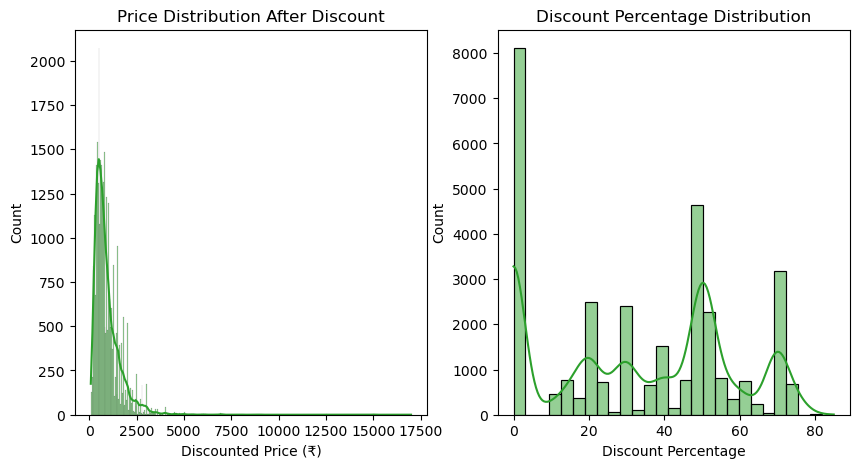

In [123]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sb.histplot(df['Discount_Price'], kde=True, color='#2ca02c',edgecolor="Black")
plt.title('Price Distribution After Discount')
plt.xlabel('Discounted Price (₹)')

plt.subplot(1,2,2)
sb.histplot(df['Discount_Percentage'], kde=True, color='#2ca02c',edgecolor="Black")
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount Percentage')
plt.show()

### Numerical features like price and discount show a wide range with significant variation.

## Frequency distribution of categorical features such as Product_Category, Product_Type, and Brand.

In [73]:
df.Brand.nunique()

191

In [74]:
df.Brand.unique()

array(['performax', 'teamspirit', 'puma', 'dnmx', 'proline', 'aero-jeans',
       'lag', 'fila', 'cross-trekkers', 'allen-solly', 'skechers',
       'airwalk', 'umbro', 'dexter', 'saucony', 'monza', 'chromozome',
       'gola', 'netplay', 'john-players-jeans', 'john-players',
       'lee-cooper', 'ecko', 'denizen-from-levis', 'sin',
       'produkt-by-jack-jones', 'duke', 'altheory-sport', 'jockey',
       'octave', 'altheory', 'network', 'disney', 'warner-brothers',
       'ecko-unltd', 'indian-terrain', 'uniquest', 'monte-carlo',
       'only-vimal-apparel', 'parx', 'killer', 'first-class', 'basics',
       'ajio', 'u-s-polo-assn-', 'indigo-nation', 'crimsoune-club',
       'pepe-jeans', 'integriti', 'monte-bianco', 'wrangler', 'arrow',
       'christofano', 'frisbee', 'woodland', 'schumann', 'crocs',
       'adidas', 'inblu', 'schumann-premium', 'buckaroo', 'hunters-bay',
       'clarks', 'id', 'reebok', 'nike', 'attilio', 'nez',
       'louis-philippe', 'red-chief', 'alberto-torres

In [75]:
df.Brand.value_counts()

Brand
performax                3029
teamspirit               1908
dnmx                     1757
netplay                  1698
avaasa-mix-n-match       1507
                         ... 
bon-bon                     1
awb                         1
hk-colours-of-fashion       1
jadu                        1
classic-polo                1
Name: count, Length: 191, dtype: int64

In [76]:
df.Category.nunique()

9

In [77]:
df.Category.value_counts()

Category
Topwear        7110
Westernwear    6641
Footwear       6030
Ethnicwear     5265
Bottomwear     2984
Activewear     2134
Fusionwear      997
Lingerie        325
Innerwear        96
Name: count, dtype: int64

In [78]:
df.Product_Name.nunique()

1799

In [79]:
df.Product_Name.value_counts()

Product_Name
Crew-Neck T-shirt        2312
Straight Kurta           2126
Fit Shirt                2117
Polo T-shirt             1126
A-line Kurta              803
                         ... 
Self-Designed Shirt         1
fit Shirt                   1
Heavy-Wash Shirt            1
Waistcoat                   1
Polka-Dotted Trousers       1
Name: count, Length: 1799, dtype: int64

## Identify outliers in Price and Discount.

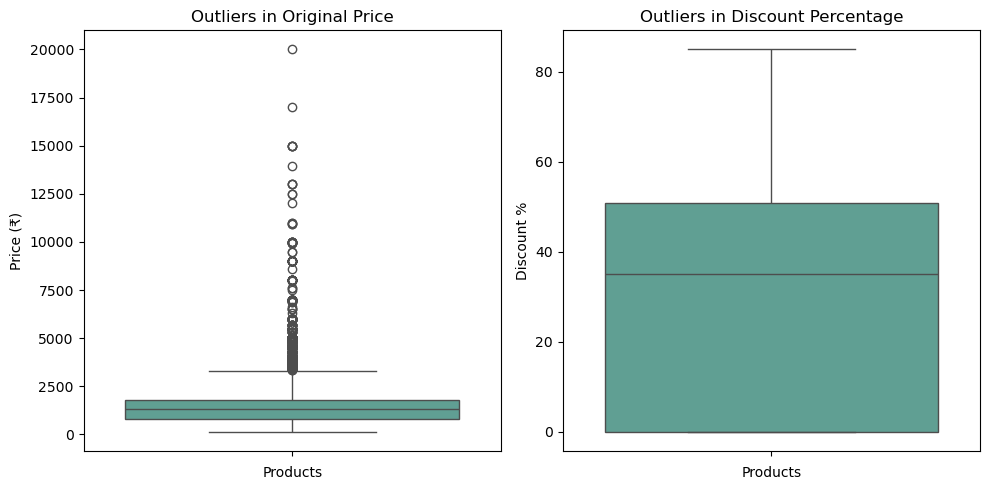

In [121]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sb.boxplot(df["Original_Price"],palette="dark:#5A9_r")
plt.title("Outliers in Original Price")
plt.xlabel("Products")
plt.ylabel("Price (₹)")

plt.subplot(1,2,2)
sb.boxplot(df["Discount_Percentage"],palette="dark:#5A9_r")
plt.title("Outliers in Discount Percentage")
plt.xlabel("Products")
plt.ylabel("Discount %")

plt.tight_layout()
plt.show()

### Price and discount outlier products exist, primarily among luxury or heavily discounted items.

# Brand & Category Analysis:

## Top Brands: Which brands have the most products?

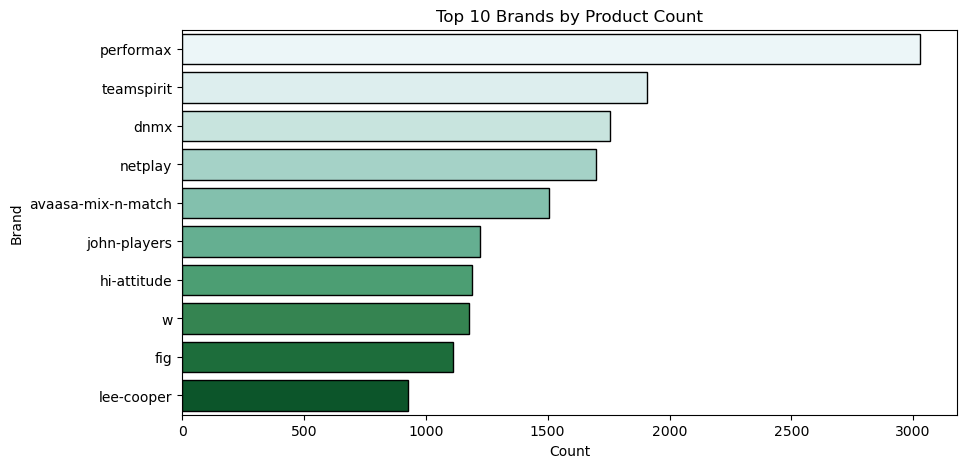

In [119]:
top_brands = df['Brand'].value_counts().head(10)
plt.figure(figsize=(10,5))
sb.barplot(x=top_brands.values, y=top_brands.index,palette='BuGn',edgecolor="Black")
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

### A small set of brands contribute the highest number of listed products.

## Category Analysis: Which categories dominate overall?

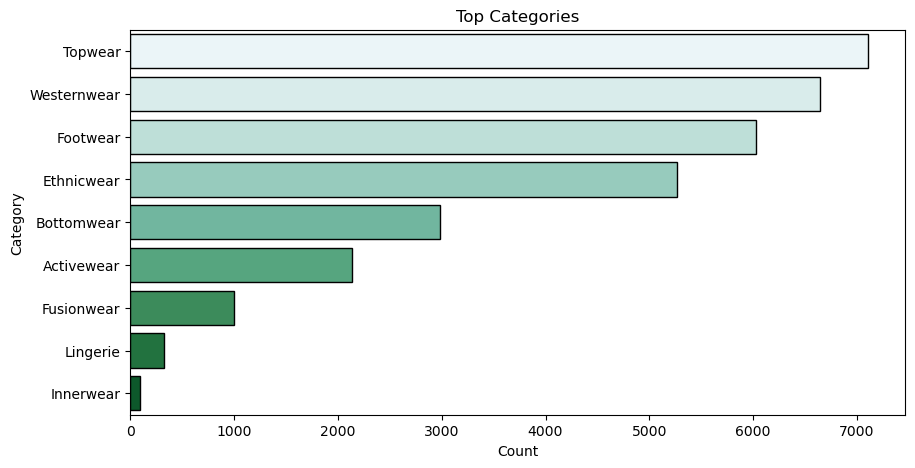

In [118]:
top_cats = df['Category'].value_counts()
plt.figure(figsize=(10,5))
sb.barplot(x=top_cats.values, y=top_cats.index, palette='BuGn',edgecolor="Black")
plt.title('Top Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

### Topwear and Westernwear dominate as the most offered categories across brands.

## Category vs Price Segment: Which categories dominate in Budget, Mid, Premium, Luxury?

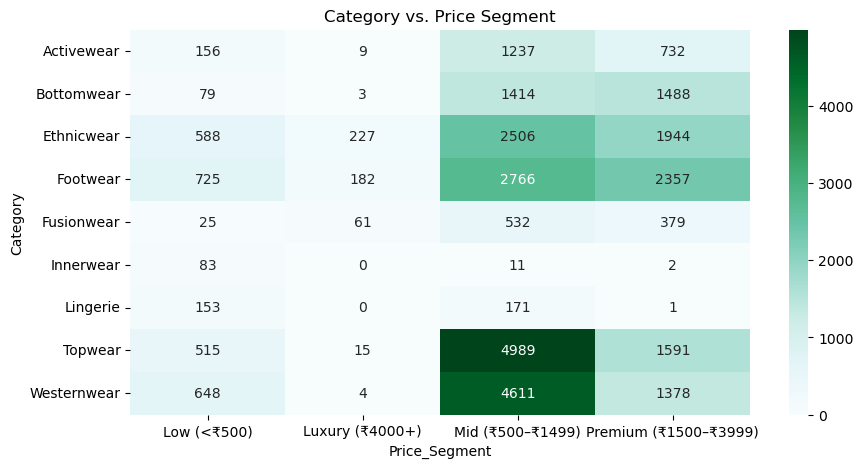

In [83]:
cat_seg = pd.pivot_table(df, index='Category', columns='Price_Segment', values='Product_ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(10,5))
sb.heatmap(cat_seg, annot=True, fmt='d', cmap='BuGn')
plt.title('Category vs. Price Segment')
plt.show()

### Mid-price segment contains the largest range of categories, especially for Topwear and Westernwear.

# Product Type Analysis:

## Which product types (T-shirts, Jeans, Sarees, Shoes) are most common?

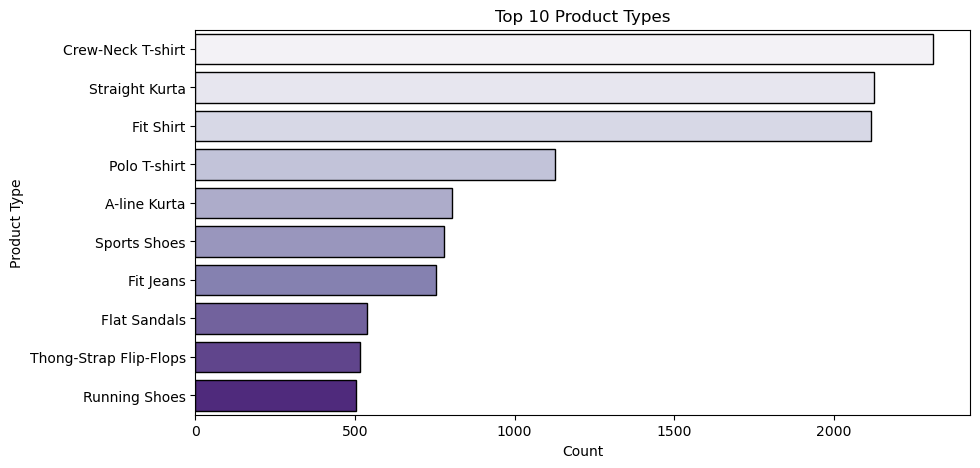

In [117]:
top_types = df['Product_Name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sb.barplot(x=top_types.values, y=top_types.index, palette='Purples',edgecolor="Black")
plt.title('Top 10 Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

### Crew-Neck T-shirts, Fit Shirts, Straight Kurtas, and Sports Shoe are the most common product types.

## Compare product type distribution across genders.

In [85]:
pro_gen=df.groupby(['Gender','Product_Name']).size().reset_index(name='Count').sort_values(['Gender','Count'],ascending=[True,False])
prod=pro_gen.groupby('Gender').head(5)
prod

,Gender,Product_Name,Count
161,Men,Fit Shirt,2087
100,Men,Crew-Neck T-shirt,1620
328,Men,Polo T-shirt,1105
156,Men,Fit Jeans,622
462,Men,Sports Shoes,376
1736,Women,Straight Kurta,2113
614,Women,A-line Kurta,803
849,Women,Crew-Neck T-shirt,692
613,Women,A-line Dress,447
925,Women,Dress Material,419


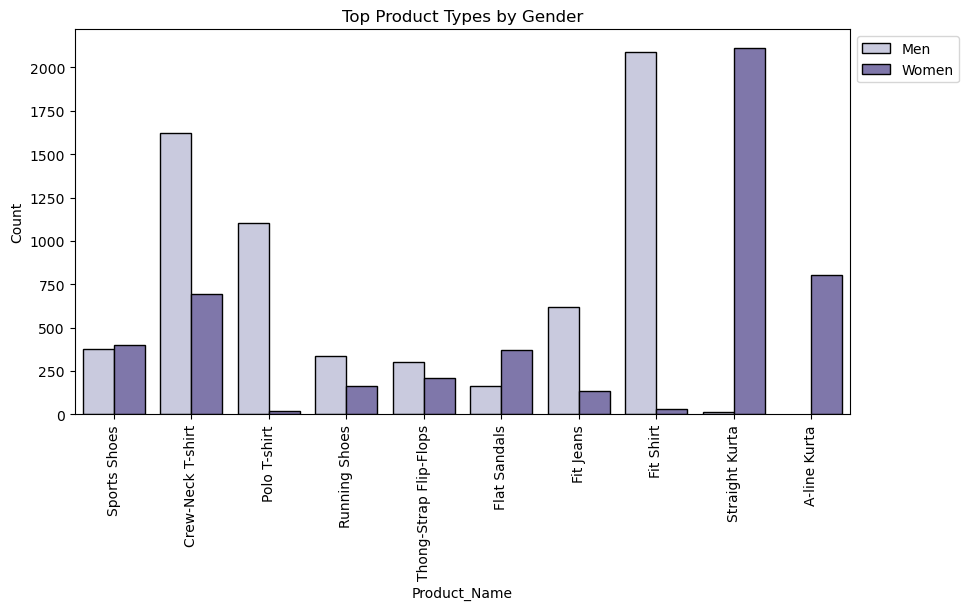

In [116]:
plt.figure(figsize=(10,5))
sb.countplot(x='Product_Name', hue='Gender', data=df[df['Product_Name'].isin(top_types.index)], palette='Purples',edgecolor="Black")
plt.title('Top Product Types by Gender')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.0, 1))
plt.xticks(rotation=90)
plt.show()

### Product type distribution reveals that Men’s segment is dominated by shirts and T-shirts, while Women’s is led by kurtas and dresses.

## Identify top product types within each category.

In [87]:
Top=df.groupby(['Category','Product_Name']).size().reset_index(name='Count').sort_values(['Category','Count'],ascending=[True,False])
Top_Product=Top.groupby('Category').head(5)
Top_Product

,Category,Product_Name,Count
172,Activewear,Sports Shoes,385
153,Activewear,Running Shoes,243
33,Activewear,Crew-Neck T-shirt,228
203,Activewear,Walking Shoes,131
195,Activewear,Track Pants,106
275,Bottomwear,Fit Jeans,580
290,Bottomwear,Flat-Front Trousers,342
397,Bottomwear,Track Pants,198
362,Bottomwear,Skinny Jeans,193
276,Bottomwear,Fit Joggers,104


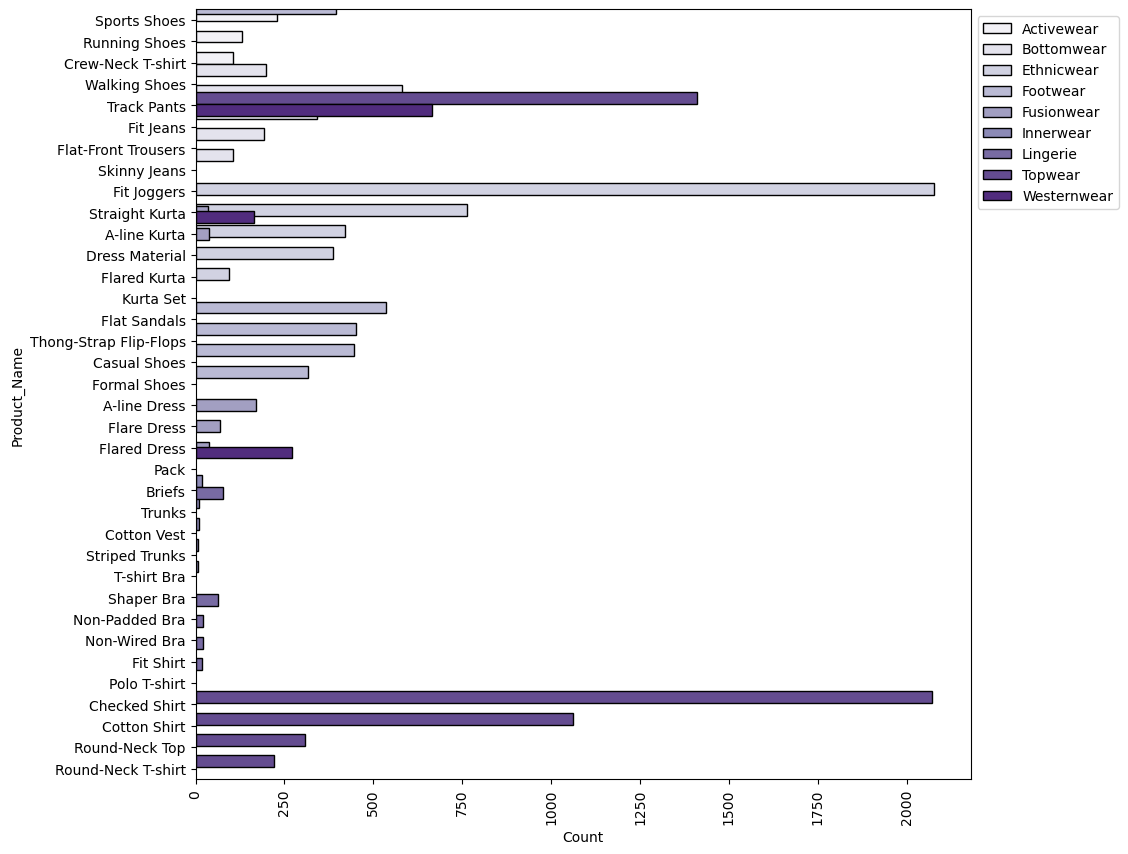

In [129]:
plt.figure(figsize=(10,10))
sb.barplot(data=Top_Product,y=Top_Product.Product_Name,x=Top_Product.Count,hue=Top_Product.Category,width=5.0,palette='Purples',edgecolor="Black")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

### Within each major category, 1–2 product types account for the majority of listings (e.g., “sports shoes” in Activewear).

# Discount Analysis:

## Discount Tier Comparison: How many products fall into each discount tier?

In [89]:
df.Discount_Tier.value_counts()

Discount_Tier
Deep (>40%)           15194
 No Discount           8107
Moderate  (20-40%)     6660
Light (10-20%)         1621
Name: count, dtype: int64

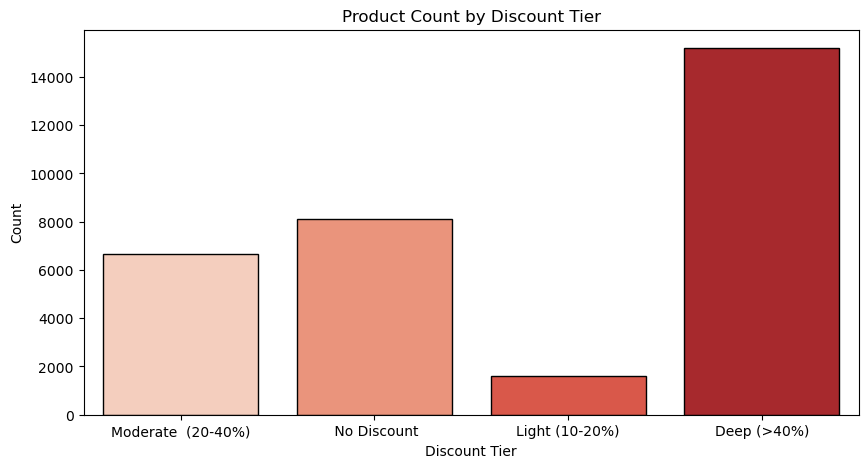

In [113]:
plt.figure(figsize=(10,5))
sb.countplot(x='Discount_Tier', data=df, palette='Reds',edgecolor="Black")
plt.title('Product Count by Discount Tier')
plt.ylabel('Count')
plt.xlabel('Discount Tier')
plt.show()

### Products with deep discounts (>40%) are more common, with many products having moderate or no discounts

## Discount % vs Product Type: Which product types get the highest average discount?

In [91]:
pro_dis=df.groupby('Product_Name')['Discount_Percentage'].mean().nlargest(5)
pro_dis

Product_Name
Brocade Angarakha    80.00
Brocade Tunic        80.00
Chanderi Kurta       79.99
Chanderi Top         79.99
Black Cardigan       74.99
Name: Discount_Percentage, dtype: float64

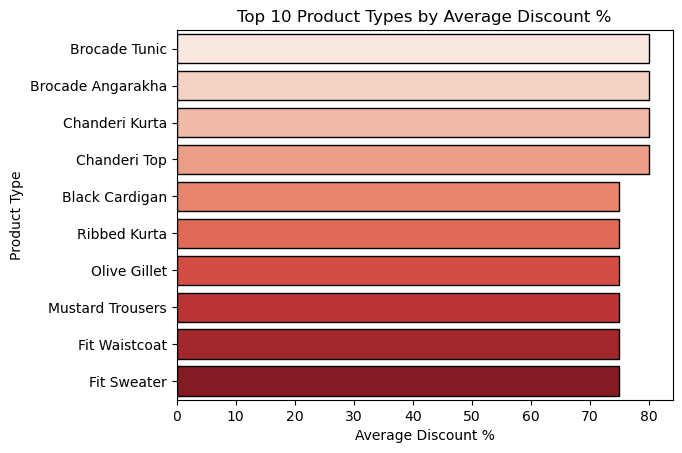

In [112]:
avg_disc_type = df.groupby('Product_Name')['Discount_Percentage'].mean().sort_values(ascending=False).head(10)
sb.barplot(x=avg_disc_type.values, y=avg_disc_type.index,palette='Reds',edgecolor="Black")
plt.title('Top 10 Product Types by Average Discount %')
plt.xlabel('Average Discount %')
plt.ylabel('Product Type')
plt.show()

### Product types like Kurta's and dresses receive the highest average percentage discounts.

## Discounts Across Categories: Which categories rely most on heavy discounts?

In [93]:
deep = pd.pivot_table(df,index='Discount_Tier',columns='Category',values='Discount_Percentage',aggfunc='count',fill_value=0)
deep

Category,Activewear,Bottomwear,Ethnicwear,Footwear,Fusionwear,Innerwear,Lingerie,Topwear,Westernwear
Discount_Tier,,,,,,,,,
No Discount,524,581,1523,2504,287,84,84,1255,1265
Deep (>40%),990,1590,2748,1350,569,6,80,4006,3855
Light (10-20%),151,196,471,25,0,0,0,460,318
Moderate (20-40%),469,617,523,2151,141,6,161,1389,1203


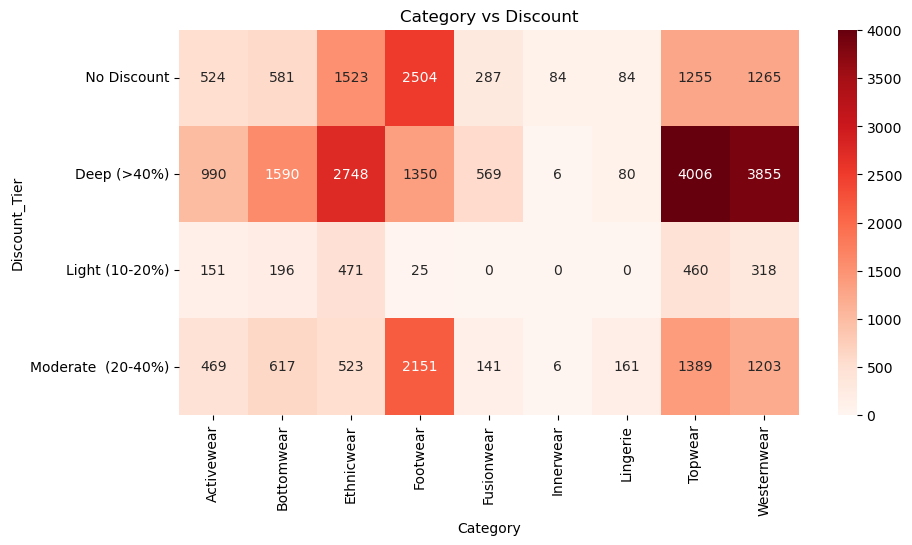

In [94]:
plt.figure(figsize=(10, 5))
sb.heatmap(deep, annot=True, fmt='d', cmap='Reds')
plt.title('Category vs Discount')
plt.show()

### Categories such as Topwear and Westernwear feature the most products with heavy discounts.

## Price vs Discount Analysis: Are higher-priced products more likely to have higher discounts?

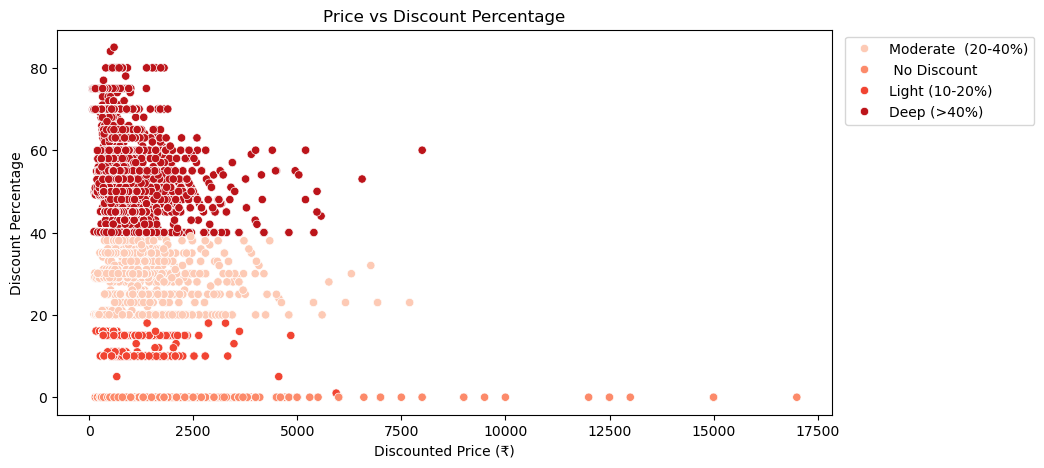

In [95]:
plt.figure(figsize=(10,5))
sb.scatterplot(x='Discount_Price', y='Discount_Percentage', data=df, hue='Discount_Tier', palette='Reds')
plt.title('Price vs Discount Percentage')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Discount Percentage')
plt.legend(bbox_to_anchor=(1.27, 1))
plt.show()

### Higher-priced products, especially in luxury and premium segments, are more likely to feature substantial discount percentages.

# Gender-Based Preferences:

## Which categories and product types dominate for Men vs Women

In [96]:
e=df.groupby(['Gender','Category','Product_Name']).size().reset_index(name='counts').sort_values(['Gender','counts'],ascending=[True,False])
f=e.groupby('Gender').head(5)
f

,Gender,Category,Product_Name,counts
540,Men,Topwear,Fit Shirt,2070
514,Men,Topwear,Crew-Neck T-shirt,1411
609,Men,Topwear,Polo T-shirt,1061
166,Men,Bottomwear,Fit Jeans,580
181,Men,Bottomwear,Flat-Front Trousers,342
1118,Women,Ethnicwear,Straight Kurta,2076
884,Women,Ethnicwear,A-line Kurta,764
1837,Women,Westernwear,Crew-Neck T-shirt,665
961,Women,Ethnicwear,Dress Material,419
975,Women,Ethnicwear,Flared Kurta,386


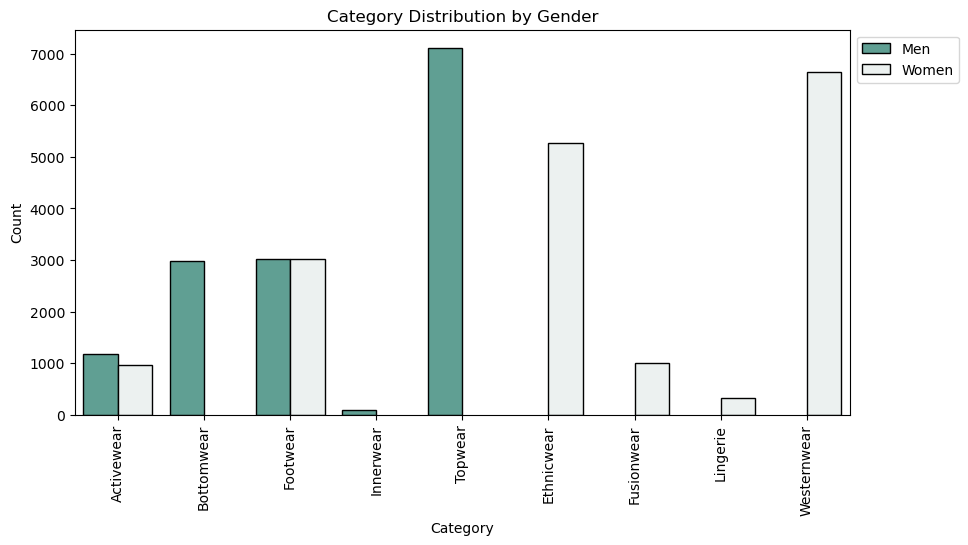

In [110]:
plt.figure(figsize=(10,5))
sb.countplot(x='Category', hue='Gender', data=df, palette='light:#5A9_r',edgecolor="Black")
plt.title('Category Distribution by Gender')
plt.ylabel('Count')
plt.xlabel('Category')
plt.legend(bbox_to_anchor=(1.0, 1))
plt.xticks(rotation=90)
plt.show()

### Women’s categories are dominated by Westernwear, while Men’s focus on Topwear.

## Gender-wise average discount %

In [98]:
avg_disc_gender = df.groupby('Gender')['Discount_Percentage'].mean().reset_index()
avg_disc_gender

,Gender,Discount_Percentage
0,Men,33.31903
1,Women,32.69499


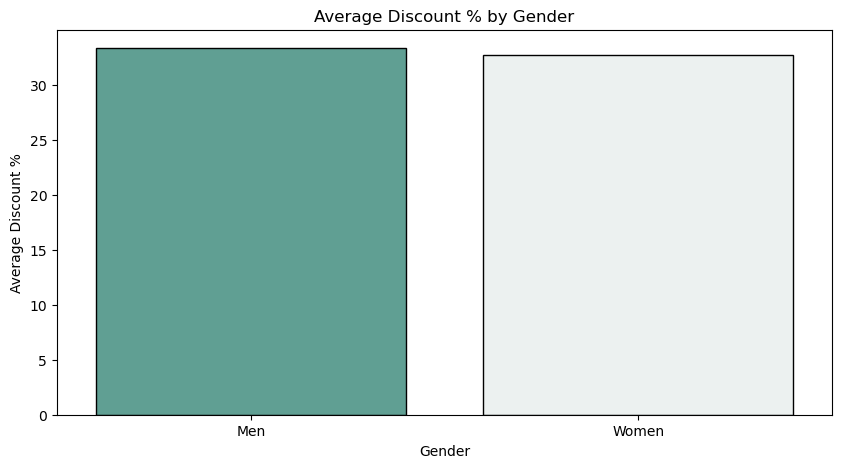

In [111]:
plt.figure(figsize=(10,5))
sb.barplot(x='Gender', y='Discount_Percentage', data=avg_disc_gender, palette='light:#5A9_r',edgecolor="Black")
plt.title('Average Discount % by Gender')
plt.ylabel('Average Discount %')
plt.xlabel('Gender')
plt.show()


### The average discount percentage is approximately equal for men’s and women’s items.

## Identify whether men’s or women’s products are more discount-driven

In [100]:
g=df.groupby(['Gender','Discount_Tier']).size().reset_index(name='Count').sort_values(['Gender','Discount_Tier'],ascending=[True,False])
h =g.groupby('Gender').head(5)
h

,Gender,Discount_Tier,Count
3,Men,Moderate (20-40%),3942
2,Men,Light (10-20%),787
1,Men,Deep (>40%),6744
0,Men,No Discount,2902
7,Women,Moderate (20-40%),2718
6,Women,Light (10-20%),834
5,Women,Deep (>40%),8450
4,Women,No Discount,5205


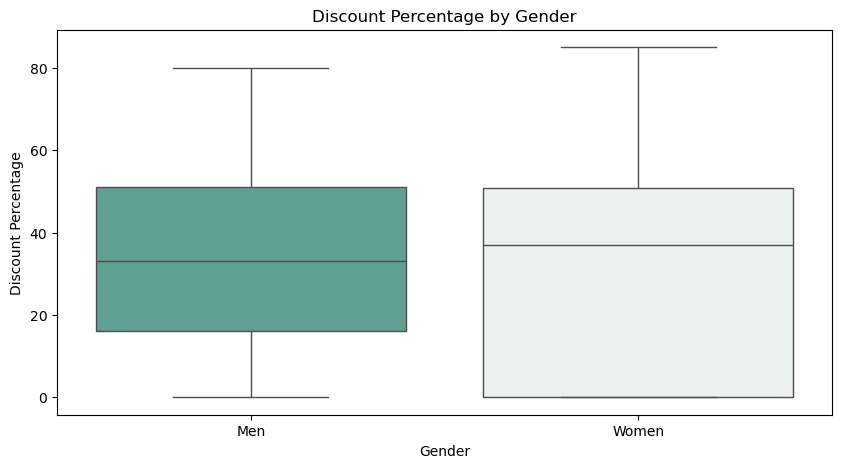

In [108]:
plt.figure(figsize=(10,5))
sb.boxplot(x='Gender', y='Discount_Percentage', data=df, palette='light:#5A9_r')
plt.title('Discount Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Discount Percentage')
plt.show()

### Women’s product lines generally see stronger reliance on discount-driven sales than men’s

# Price Segment Analysis:

## Distribution of products across Budget, Mid, Premium, Luxury.

Price_Segment
Mid (₹500–₹1499)         18237
Premium (₹1500–₹3999)     9872
Low (<₹500)               2972
Luxury (₹4000+)            501
Name: count, dtype: int64

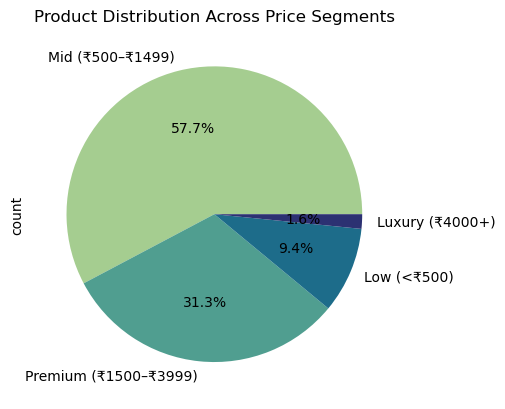

In [109]:
i = df.Price_Segment.value_counts()
i.plot(kind='pie',autopct='%1.1f%%',cmap ="crest",title = "Product Distribution Across Price Segments")
i

### The majority of products are in the Mid price segment, with Budget and Premium segments also strongly represented.

## Which categories dominate in each segment?

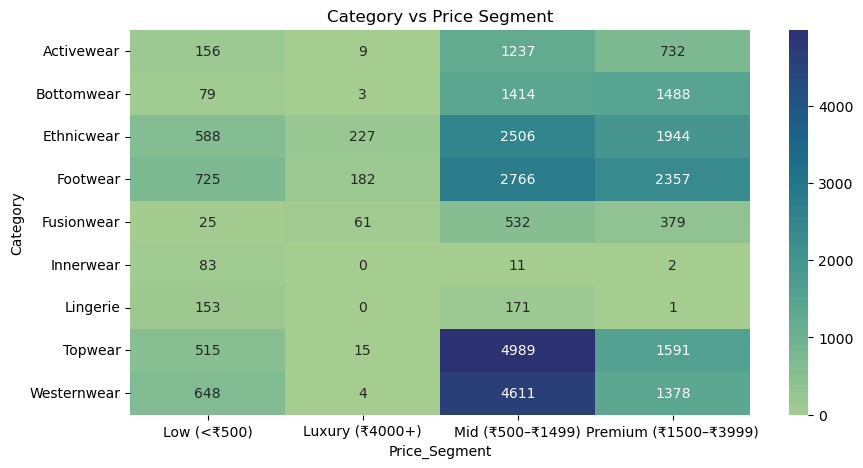

In [105]:
seg_cat = pd.pivot_table(df, index='Category', columns='Price_Segment', values='Product_ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 5))
sb.heatmap(seg_cat, annot=True, fmt='d', cmap='crest',edgecolor="Black")
plt.title('Category vs Price Segment')
plt.show()

### Footwear and Westernwear lead in Low, Ethnicwear in Luxury, Topwear and Westernwear in Mid, and Footwear, Ethnicwear, and Bottomwear in Premium segments.